##Installations

In [ ]:
!pip install deepbrain
!pip install nilearn
!pip uninstall opencv-python
!pip install -U opencv-contrib-python

Requirement already up-to-date: opencv-contrib-python in /usr/local/lib/python3.7/dist-packages (4.5.2.54)


##Imports

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from matplotlib.colors import ListedColormap
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import cv2 as cv
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from matplotlib import pyplot
import os
import shutil
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import collections

#Disease Classification

#Feature Extraction

In [ ]:
data=[]
target_arr=[]

width = 160
height = 160
dim = (width, height)

datadir='/content/drive/MyDrive/MRIPics'

list_descriptors = []

for subdir, dirs, files in os.walk(datadir):
  for file in files: 
    img = cv.imread(os.path.join(subdir,file))
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    sift = cv.SIFT_create()
    kp, descriptors = sift.detectAndCompute(img, None)
    if not kp:
      shutil.rmtree(subdir)
      del files[:]
      continue
    list_descriptors.append(descriptors)

list_descriptors=list(filter(lambda x: np.any(x), list_descriptors))
descriptor_matrix = np.vstack(list_descriptors)

model = KMeans(n_clusters=100)
model.fit(descriptor_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model = KMeans(n_clusters=100)
model.fit(descriptor_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##KMeans Clustering

In [ ]:
data=[]
counting=[]
l=0
feature_vec=np.zeros(100)
for subdir, dirs, files in os.walk(datadir):
  #l+=1
  for file in files:
    if 'x'in file:
      l+=1
      img = cv.imread(os.path.join(subdir,file))
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
      kp = sift.detect(gray,None)
      sift = cv.SIFT_create()
      kp, des = sift.detectAndCompute(gray,None)
      if not kp:
        shutil.rmtree(subdir)
        del files[:]
        continue
      else:
        yhat = model.predict(des)
    elif 'y' in file:
      img = cv.imread(os.path.join(subdir,file))
      gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      sift = cv.SIFT_create()
      kp = sift.detect(gray,None)
      sift = cv.SIFT_create()
      kp, des = sift.detectAndCompute(gray,None)
      yhat = model.predict(des)
    elif 'z' in file:
      img = cv.imread(os.path.join(subdir,file))
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
      sift = cv.SIFT_create()
      kp = sift.detect(gray,None)
      sift = cv.SIFT_create()
      kp, des = sift.detectAndCompute(gray,None)
      yhat = model.predict(des)

    for i in yhat:
      feature_vec[i]+=1

  #print(l)
  counting.append(l)
  data.append(feature_vec)
  feature_vec=np.zeros(100)

Removing empty arrays

In [ ]:
import collections
print([item for item, count in collections.Counter(counting).items() if count > 1])
duplic=[item for item, count in collections.Counter(counting).items() if count > 1]
#duplic.insert(1,0)



[0, 925, 1168, 1910]


In [ ]:
for a in duplic:
  del data[a]
  #duplic = [x - 1 for x in duplic]

Labels

In [ ]:
target_arr=[]
Categories=['AD','CN','MCI']
directory='/content/drive/MyDrive/MRIPics'
for f in Categories:
  path=os.path.join(directory,f)
  for dir1 in os.listdir(path):
    
    target_arr.append(Categories.index(f))
target=np.array(target_arr)

Creating dataframe from data and labels

In [ ]:
df=pd.DataFrame(data)
df['Target']=target
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

Split Train Test

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

#SVM

In [ ]:
#parameter range
param_grid = {'C': [0.1, 1, 10,100],
              'gamma': [ 0.1 ,0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
 

grid = GridSearchCV(SVC(), param_grid, refit=True) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 

print(grid.best_params_) 

print(grid.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
#classif=SVC(kernel='rbf', C = 10.0, gamma=0.001) #we create a SVM with default parameters
#classif.fit(x_train,y_train) #we learn the model according to given data

grid_pred = grid.predict(x_test)  
# print classification report
svm_accuracy = accuracy_score(y_test, grid_pred)
print('Accuracy', svm_accuracy)
#cm = confusion_matrix(y_test, grid_pred)
#print(cm) 
print(classification_report(y_test, grid_pred))

Accuracy 0.8284734133790738
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       185
           1       0.81      0.73      0.77       198
           2       0.89      0.93      0.91       200

    accuracy                           0.83       583
   macro avg       0.83      0.83      0.83       583
weighted avg       0.83      0.83      0.83       583



#Plotting: Confusion Matrix

[[152  28   5]
 [ 36 145  17]
 [  7   7 186]]


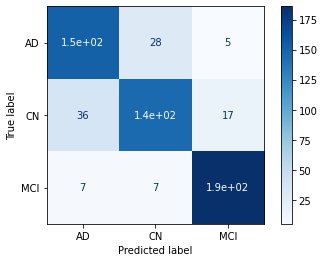

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(grid, x_test, y_test,
                                 display_labels=Categories,
                                 cmap=plt.cm.Blues)


print(disp.confusion_matrix)

plt.show()

#Random Forest

In [ ]:
clf = RandomForestClassifier()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 13.3min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [ ]:
pred= grid_search.predict(x_test)  
# print classification report
rf_accuracy = accuracy_score(y_test, pred)
print('Accuracy', rf_accuracy)
#cm = confusion_matrix(Y_test, grid_pred)
#print(cm) 
print(classification_report(y_test, pred))

Accuracy 0.7667238421955404
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       185
           1       0.70      0.65      0.68       198
           2       0.84      0.94      0.89       200

    accuracy                           0.77       583
   macro avg       0.76      0.76      0.76       583
weighted avg       0.76      0.77      0.76       583



#Plotting: Confusion Matrix

[[152  28   5]
 [ 36 145  17]
 [  7   7 186]]


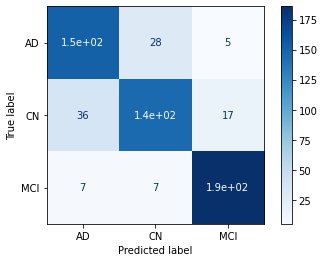

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(grid, x_test, y_test,
                                 display_labels=Categories,
                                 cmap=plt.cm.Blues)


print(disp.confusion_matrix)

plt.show()

#Logistic Regression

In [ ]:
#parameter range
param_grid = {'C': np.logspace(-3,3,7),
              'penalty': ["l1","l2"]}  
 

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 

print(grid.best_params_) 

print(grid.best_estimator_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

{'C': 0.001, 'penalty': 'l2'}
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_pred  =  grid.predict(x_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy', lr_accuracy)
#cm = confusion_matrix(Y_test, grid_pred)
#print(cm) 
print(classification_report(y_test, y_pred))

Accuracy 0.7701543739279588
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       185
           1       0.71      0.68      0.70       198
           2       0.87      0.93      0.90       200

    accuracy                           0.77       583
   macro avg       0.76      0.77      0.77       583
weighted avg       0.77      0.77      0.77       583



#Plotting: Confusion Matrix

[[128  48   9]
 [ 45 135  18]
 [  7   7 186]]


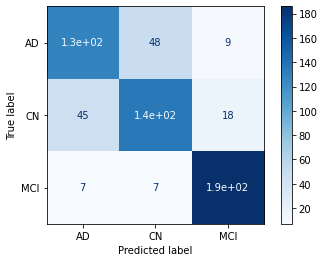

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(grid, x_test, y_test,
                                 display_labels=Categories,
                                 cmap=plt.cm.Blues)


print(disp.confusion_matrix)

plt.show()

#Decision Trees

In [ ]:
clf = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': range(1,10) ,
    'min_samples_split': range(1,5)
}

grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   31.3s finished


{'criterion': 'gini',
 'max_depth': 90,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [ ]:
pred= grid_search.predict(x_test)  
# print classification report
dt_accuracy = accuracy_score(y_test, pred)
print('Accuracy', dt_accuracy)
#cm = confusion_matrix(Y_test, grid_pred)
#print(cm) 
print(classification_report(y_test, pred))

Accuracy 0.5951972555746141
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       185
           1       0.51      0.48      0.49       198
           2       0.74      0.71      0.73       200

    accuracy                           0.60       583
   macro avg       0.60      0.59      0.59       583
weighted avg       0.60      0.60      0.60       583



#Plotting: Confusion Matrix

[[108  55  22]
 [ 74  96  28]
 [ 18  39 143]]


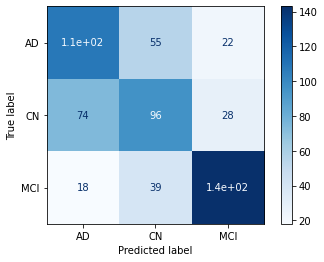

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(grid_search, x_test, y_test,
                                 display_labels=Categories,
                                 cmap=plt.cm.Blues)


print(disp.confusion_matrix)

plt.show()

#Plotting: Classifier Accuracy

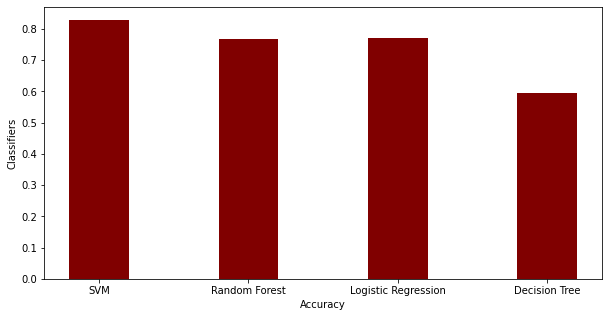

In [ ]:
classifiers = ['SVM', 'Random Forest', 'Logistic Regression', 'Decision Tree']
accuracy = [svm_accuracy,rf_accuracy,lr_accuracy,dt_accuracy]
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classifiers, accuracy, color ='maroon',
        width = 0.4)
plt.xlabel("Accuracy")
plt.ylabel("Classifiers")
plt.show()

#Plotting: Single Representation Vector

AD


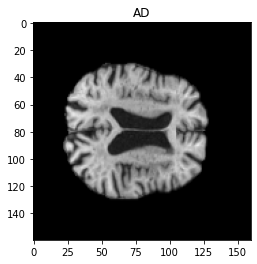

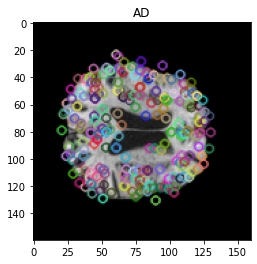

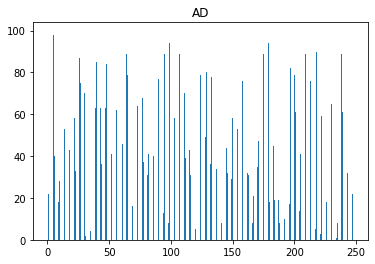

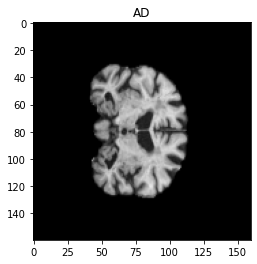

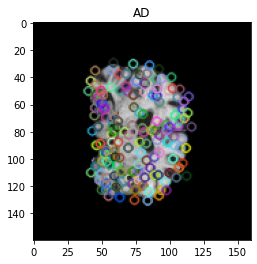

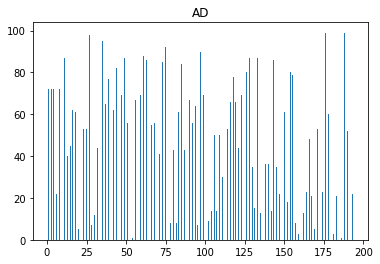

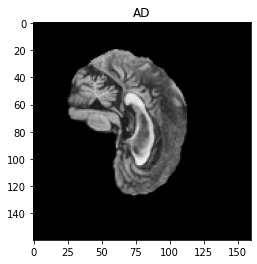

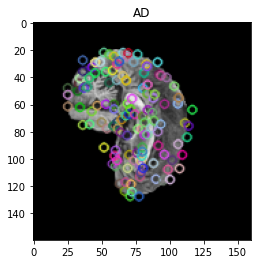

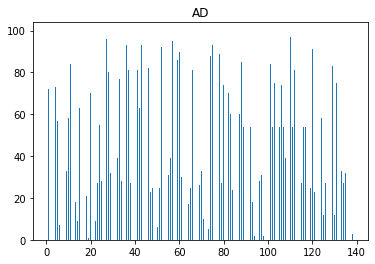

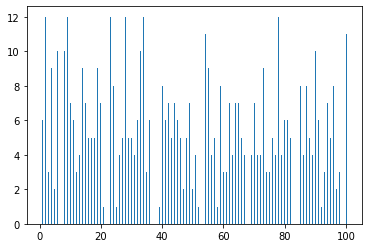

CN


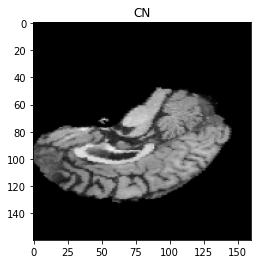

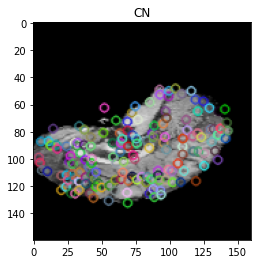

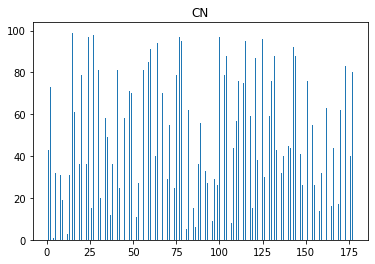

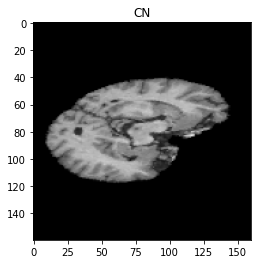

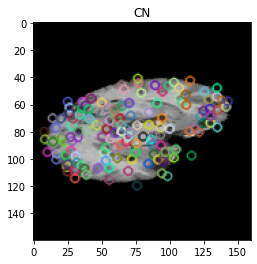

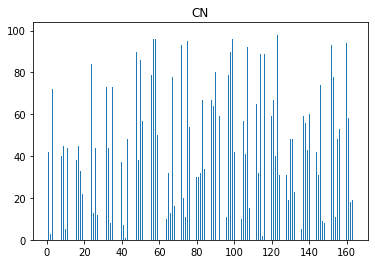

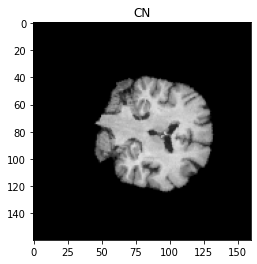

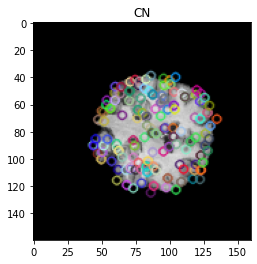

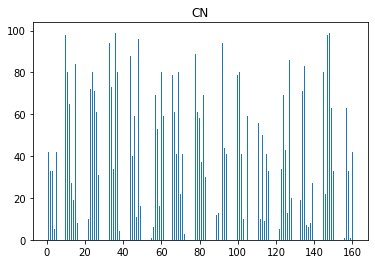

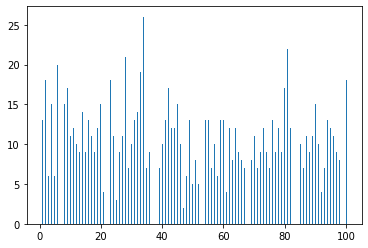

MCI


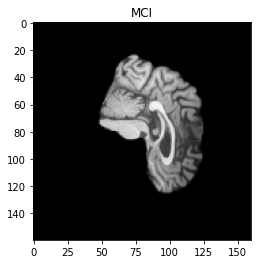

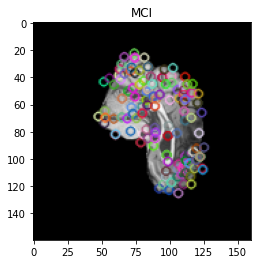

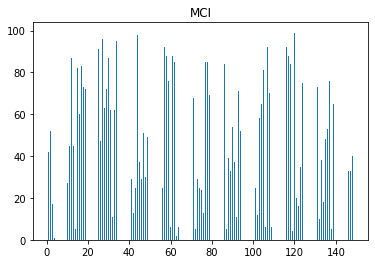

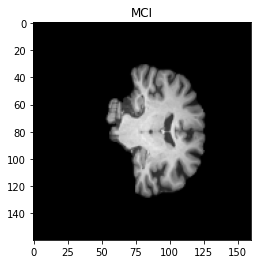

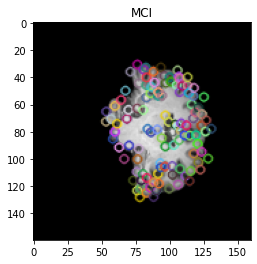

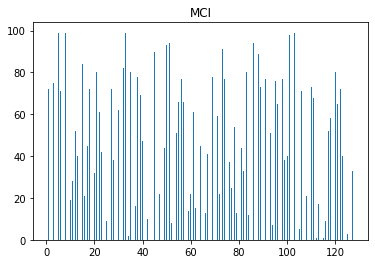

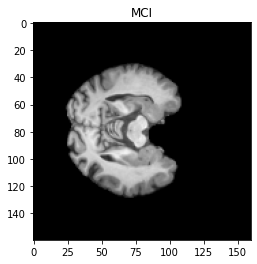

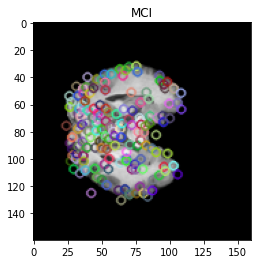

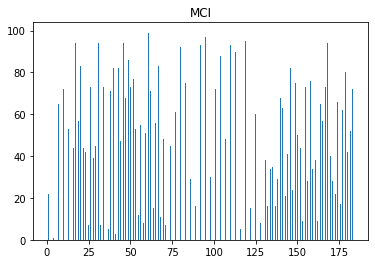

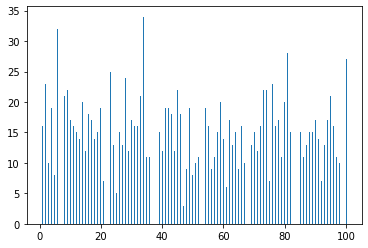

In [ ]:
path='/content/drive/MyDrive/MRIPics/'
width = 160
height = 160
dim = (width, height)

for filename in os.listdir(path):
  print(filename)
  folder=os.path.join(path,filename)
  random_file=random.choice(os.listdir(folder))
  file=os.path.join(folder,random_file)
  i=0
  #p,axarr=plt.subplots(1,3)
  for f in os.listdir(file):
    ffile=os.path.join(file,f)
    if 'x'in f:
      l+=1
      img = cv.imread(ffile)
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
      plt.imshow(img)
      plt.title(filename)
      plt.show()
      kp = sift.detect(gray,None)
      sift = cv.SIFT_create()
      kp, des = sift.detectAndCompute(gray,None)
      img1=cv2.drawKeypoints(gray,kp,img.copy())
      plt.imshow(img1)
      plt.title(filename)
      plt.show()
      yhat = model.predict(des)
      array=np.array(range(1,len(yhat)+1))
      plt.bar(array, yhat, width=0.3)
      plt.title(filename)
      plt.show()
    elif 'y' in f:
      img = cv.imread(ffile)
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
      plt.imshow(img)
      plt.title(filename)
      plt.show()
      sift = cv.SIFT_create()
      kp = sift.detect(gray,None)
      sift = cv.SIFT_create()
      kp, des = sift.detectAndCompute(gray,None)
      img1=cv2.drawKeypoints(gray,kp,img.copy())
      plt.imshow(img1)
      plt.title(filename)
      plt.show()
      yhat = model.predict(des)
      array=np.array(range(1,len(yhat)+1))
      plt.bar(array, yhat, width=0.3)
      plt.title(filename)
      plt.show()
    elif 'z' in f:
      img = cv.imread(ffile)
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
      plt.imshow(img)
      plt.title(filename)
      plt.show()
      sift = cv.SIFT_create()
      kp = sift.detect(gray,None)
      sift = cv.SIFT_create()
      kp, des = sift.detectAndCompute(gray,None)
      img1=cv2.drawKeypoints(gray,kp,img.copy())
      plt.imshow(img1)
      plt.title(filename)
      plt.show()
      yhat = model.predict(des)
      array=np.array(range(1,len(yhat)+1))
      plt.bar(array, yhat, width=0.3)
      plt.title(filename)
      plt.show()

    for i in yhat:
      feature_vec[i]+=1
  array=np.array(range(1,len(feature_vec)+1))
    #plt.figure(figsize=(10, 10))
  plt.bar(array, feature_vec, width=0.3)
  plt.show()

#MCI classification

#Feature Extraction

In [ ]:
data=[]
target_arr=[]

width = 160
height = 160
dim = (width, height)

datadir='/content/drive/MyDrive/MCIPics'

list_descriptors = []

for subdir, dirs, files in os.walk(datadir):
  for file in files: 
    img = cv.imread(os.path.join(subdir,file))
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    sift = cv.SIFT_create()
    kp, descriptors = sift.detectAndCompute(img, None)
    if not kp:
      shutil.rmtree(subdir)
      del files[:]
      continue
    list_descriptors.append(descriptors)

list_descriptors=list(filter(lambda x: np.any(x), list_descriptors))
descriptor_matrix = np.vstack(list_descriptors)

model = KMeans(n_clusters=100)
model.fit(descriptor_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
model = KMeans(n_clusters=100)
model.fit(descriptor_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##KMeans Clustering

In [ ]:
data=[]
counting=[]
l=0
feature_vec=np.zeros(100)
for subdir, dirs, files in os.walk(datadir):
  #l+=1
  for file in files:
    if 'x'in file:
      l+=1
      img = cv.imread(os.path.join(subdir,file))
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
      kp = sift.detect(gray,None)
      sift = cv.SIFT_create()
      kp, des = sift.detectAndCompute(gray,None)
      if not kp:
        shutil.rmtree(subdir)
        del files[:]
        continue
      else:
        yhat = model.predict(des)
    elif 'y' in file:
      img = cv.imread(os.path.join(subdir,file))
      gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      sift = cv.SIFT_create()
      kp = sift.detect(gray,None)
      sift = cv.SIFT_create()
      kp, des = sift.detectAndCompute(gray,None)
      yhat = model.predict(des)
    elif 'z' in file:
      img = cv.imread(os.path.join(subdir,file))
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
      sift = cv.SIFT_create()
      kp = sift.detect(gray,None)
      sift = cv.SIFT_create()
      kp, des = sift.detectAndCompute(gray,None)
      yhat = model.predict(des)

    for i in yhat:
      feature_vec[i]+=1

  #print(l)
  counting.append(l)
  data.append(feature_vec)
  feature_vec=np.zeros(100)

Removing empty arrays

In [ ]:
import collections
print([item for item, count in collections.Counter(counting).items() if count > 1])
duplic=[item for item, count in collections.Counter(counting).items() if count > 1]
duplic.insert(1,0)

  #duplic = [x + 1 for x in duplic]

[0, 500]


In [ ]:
for a in duplic:
  del data[a]

In [ ]:
del data[0]

Labels

In [ ]:
target_arr=[]
Categories=['EMCI','LMCI']
directory='/content/drive/MyDrive/MCIPics'
for f in Categories:
  path=os.path.join(directory,f)
  for dir1 in os.listdir(path):
    
    target_arr.append(Categories.index(f))
target=np.array(target_arr)

Creating dataframe from data and labels

In [ ]:
df=pd.DataFrame(data)
df['Target']=target
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

Split Train Test


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

#SVM

In [ ]:
#parameter range
param_grid = {'C': [0.1, 1, 10,100],
              'gamma': [ 0.1 ,0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
 

grid = GridSearchCV(SVC(), param_grid, refit=True) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 

print(grid.best_params_) 

print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
grid_pred = grid.predict(x_test)  
# print classification report
svm1_accuracy = accuracy_score(y_test, grid_pred)
print('Accuracy', svm1_accuracy)
#cm = confusion_matrix(y_test, grid_pred)
#print(cm) 
print(classification_report(y_test, grid_pred))

Accuracy 0.74
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       100
           1       0.86      0.57      0.69       100

    accuracy                           0.74       200
   macro avg       0.77      0.74      0.73       200
weighted avg       0.77      0.74      0.73       200



#Plotting: Confusion Matrix

[[91  9]
 [43 57]]


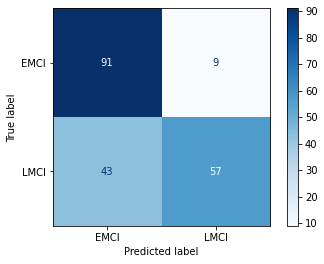

In [ ]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(grid, x_test, y_test,
                                 display_labels=Categories,
                                 cmap=plt.cm.Blues)

#print(title)
print(disp.confusion_matrix)

plt.show()

#Plotting: Classifer Accuracy

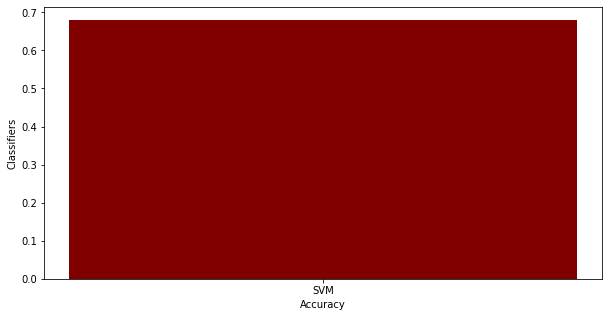

In [ ]:
classifiers = ['SVM']
accuracy = [svm1_accuracy]
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classifiers, accuracy, color ='maroon',
        width = 0.4)
plt.xlabel("Accuracy")
plt.ylabel("Classifiers")
plt.show()

EMCI


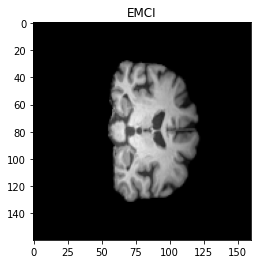

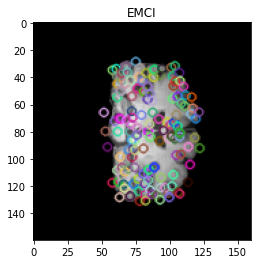

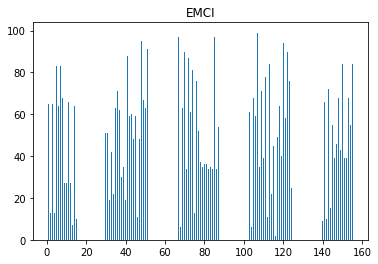

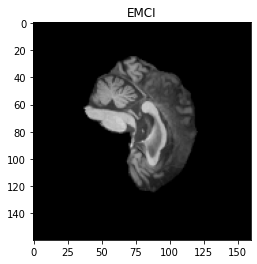

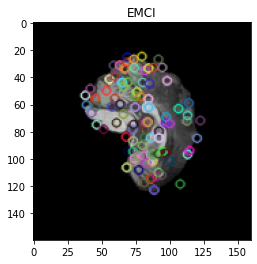

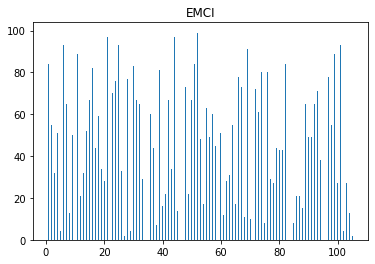

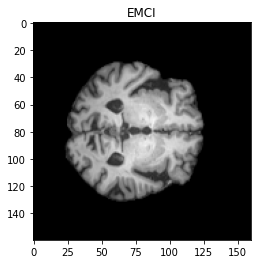

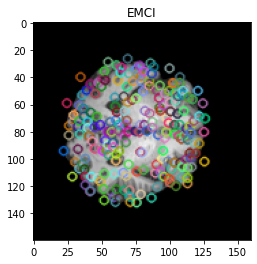

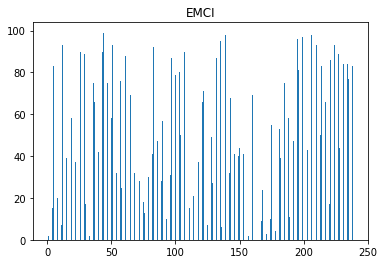

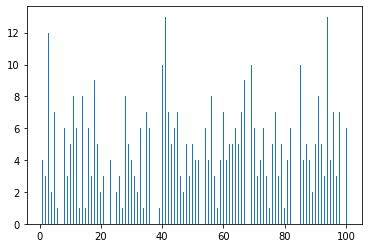

LMCI


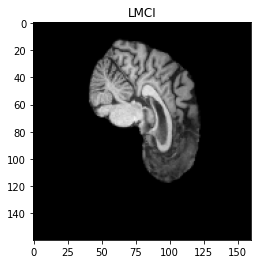

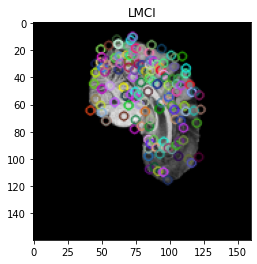

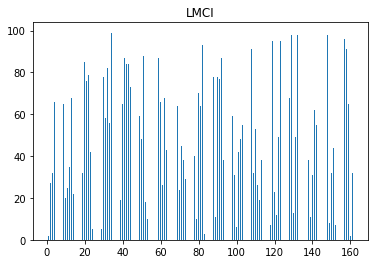

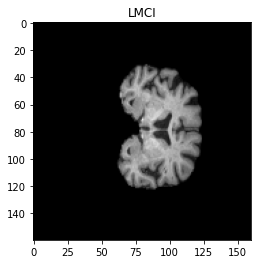

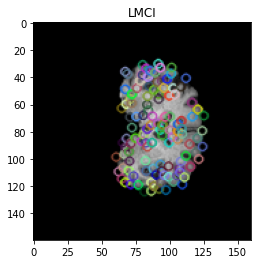

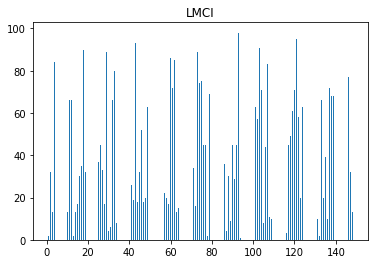

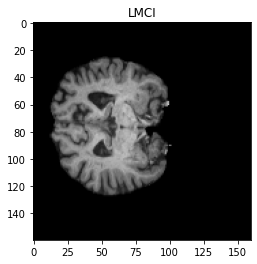

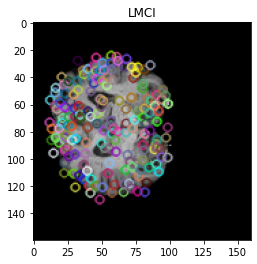

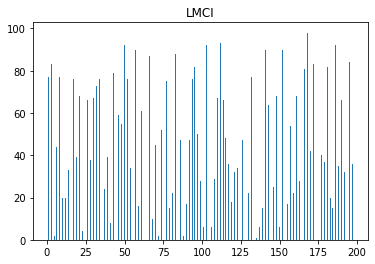

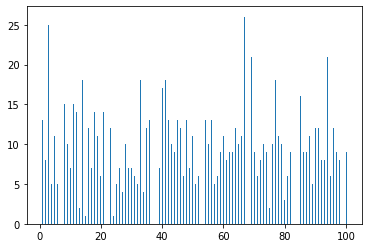

In [ ]:
path='/content/drive/MyDrive/MCIPics/'
width = 160
height = 160
dim = (width, height)

for filename in os.listdir(path):
  print(filename)
  folder=os.path.join(path,filename)
  random_file=random.choice(os.listdir(folder))
  file=os.path.join(folder,random_file)
  i=0
  #p,axarr=plt.subplots(1,3)
  for f in os.listdir(file):
    ffile=os.path.join(file,f)
    if 'x'in f:
      l+=1
      img = cv.imread(ffile)
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
      plt.imshow(img)
      plt.title(filename)
      plt.show()
      kp = sift.detect(gray,None)
      sift = cv.SIFT_create()
      kp, des = sift.detectAndCompute(gray,None)
      img1=cv2.drawKeypoints(gray,kp,img.copy())
      plt.imshow(img1)
      plt.title(filename)
      plt.show()
      yhat = model.predict(des)
      array=np.array(range(1,len(yhat)+1))
      plt.bar(array, yhat, width=0.3)
      plt.title(filename)
      plt.show()
    elif 'y' in f:
      img = cv.imread(ffile)
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
      plt.imshow(img)
      plt.title(filename)
      plt.show()
      sift = cv.SIFT_create()
      kp = sift.detect(gray,None)
      sift = cv.SIFT_create()
      kp, des = sift.detectAndCompute(gray,None)
      img1=cv2.drawKeypoints(gray,kp,img.copy())
      plt.imshow(img1)
      plt.title(filename)
      plt.show()
      yhat = model.predict(des)
      array=np.array(range(1,len(yhat)+1))
      plt.bar(array, yhat, width=0.3)
      plt.title(filename)
      plt.show()
    elif 'z' in f:
      img = cv.imread(ffile)
      img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
      gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
      plt.imshow(img)
      plt.title(filename)
      plt.show()
      sift = cv.SIFT_create()
      kp = sift.detect(gray,None)
      sift = cv.SIFT_create()
      kp, des = sift.detectAndCompute(gray,None)
      img1=cv2.drawKeypoints(gray,kp,img.copy())
      plt.imshow(img1)
      plt.title(filename)
      plt.show()
      yhat = model.predict(des)
      array=np.array(range(1,len(yhat)+1))
      plt.bar(array, yhat, width=0.3)
      plt.title(filename)
      plt.show()

    for i in yhat:
      feature_vec[i]+=1
  array=np.array(range(1,len(feature_vec)+1))
    #plt.figure(figsize=(10, 10))
  plt.bar(array, feature_vec, width=0.3)
  plt.show()